**Author:** Regina Hoo

**Institution:** Wellcome Sanger institute

**April, 2023**



---

# Luminex analysis

In [1]:
#pip install anndata2ri

Note: you may need to restart the kernel to use updated packages.


In [2]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [3]:
%%R
library(RColorBrewer)
library(pheatmap)
library(ggplot2)

## Luminex 24h

In [10]:
%%R
# Luminex
df_lum=read.csv("luminex_24hpi_log2FC_pg_per_ml.csv", header=T, row.names=1 )
df_lum

       Hrv171.Tox.24H Hrv172.Tox.24H Hrv135.Lis.24H Hrv136.Lis.24H
GM-CSF     1.41179229    0.368330323     3.72031831     1.35143375
IL-1b     -0.32706458   -1.325600999     3.45578947     1.00782420
MIP-1a     0.68310185    0.581342523     2.92686347     1.10594903
IL-10      0.09597411    0.412125706     1.71956683    -0.23659262
G-CSF      1.41123145    0.743397371     1.01200903     0.50559463
IL-1RA     0.55139139   -0.659686280     2.57091486     1.46829473
RANTES    -0.39263366   -0.142554409     1.42577612     0.47811206
MIP-1b     1.62237644    1.515908140     3.15934834     0.47379881
IL1-a      0.00000000   -2.924910525     1.33372541     0.61782835
IP-10      2.97885819    4.533038182     0.66197469     0.18266940
GRO        0.32958585    0.064138462     0.11693243     0.06049040
IL-6       0.36871949   -0.004757364    -0.03359010    -0.40899979
IL-8       0.33231815    0.014064356     0.27337863    -0.09460290
MCP-1      2.52120446    0.946429153     0.08596515    -0.0445

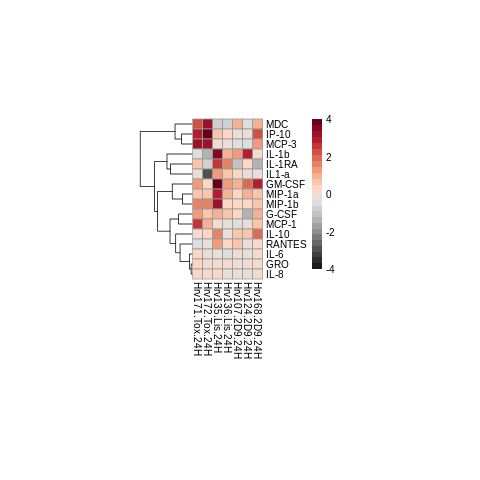

In [11]:
%%R
numberColors <- 26 #number of colors/ to include
colours <- colorRampPalette(rev(brewer.pal(n = 10, name = "RdGy")))(numberColors)  
#creating the colour palette
breaks <- c(seq(-4, 0, length.out=ceiling(numberColors/2) + 1), #setting Minimum for scale
            seq(max(df_lum)/numberColors, 
          4, length.out=floor(numberColors/2))) #setting Maximum for scale


# Plot the  heatmap with the color and break options
df_lum<-pheatmap(df_lum,cellwidth = 10,cellheight=10, cluster_cols = FALSE, cluster_rows = TRUE,
         color = colours, breaks = breaks)

ggsave(df_lum, filename = paste0('luminex_24hpi_log2FC_pg_per_ml_.pdf'), width = 8, height = 8,
       dpi = 300)